In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
normalImg= cv2.imread('DATA\\normal\\normal133.jpg')
potholesImg= cv2.imread('DATA\\potholes\\potholes1.jpg')

In [3]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

In [4]:
def cv_show(img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)

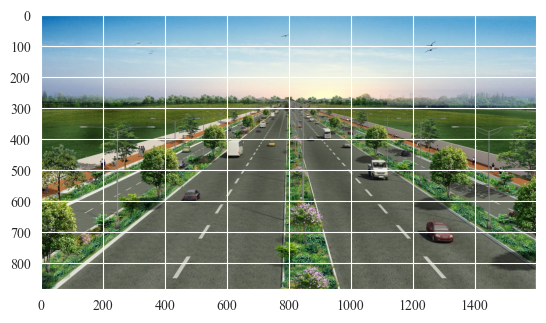

In [5]:
cv_show(normalImg)

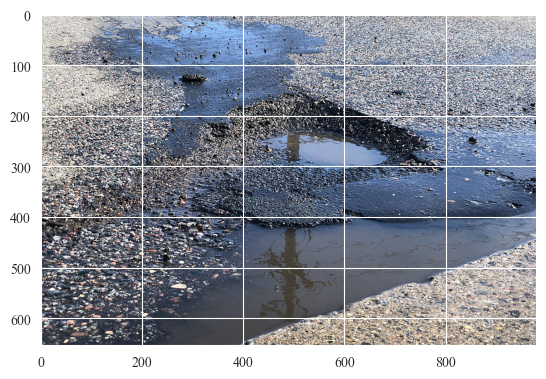

In [6]:
cv_show(potholesImg)

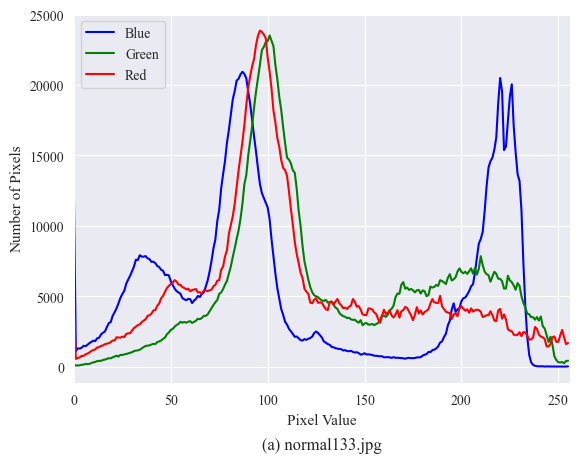

In [7]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([normalImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    
plt.legend(['Blue','Green','Red'])
plt.xlim([0,256])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('(a) normal133.jpg',y=-0.2,fontsize=12)
plt.xlabel('Pixel Value',fontsize=11)
plt.ylabel('Number of Pixels',fontsize=11)
plt.savefig('Figures\\normal133RGB直方图.pdf',bbox_inches='tight')

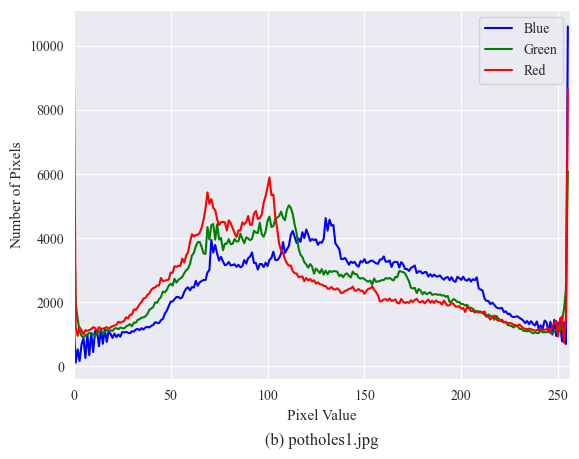

In [8]:
color = ('b','g','r')

for i,col in enumerate(color):
    histr = cv2.calcHist([potholesImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)

plt.legend(['Blue','Green','Red'])
plt.xlim([0,256])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('(b) potholes1.jpg',y=-0.2,fontsize=12)
plt.xlabel('Pixel Value',fontsize=11)
plt.ylabel('Number of Pixels',fontsize=11)
plt.savefig('Figures\\potholes1RGB直方图.pdf',bbox_inches='tight')

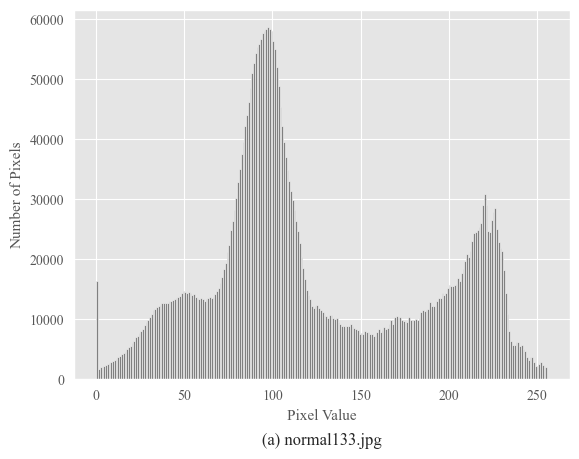

In [9]:
plt.style.use('ggplot')
plt.hist(normalImg.ravel(),256,[0,256],color='grey')
plt.title('(a) normal133.jpg',y=-0.2,fontsize=12)
plt.xlabel('Pixel Value',fontsize=11)
plt.ylabel('Number of Pixels',fontsize=11)
plt.savefig('Figures\\normal133灰度直方图.pdf',bbox_inches='tight')

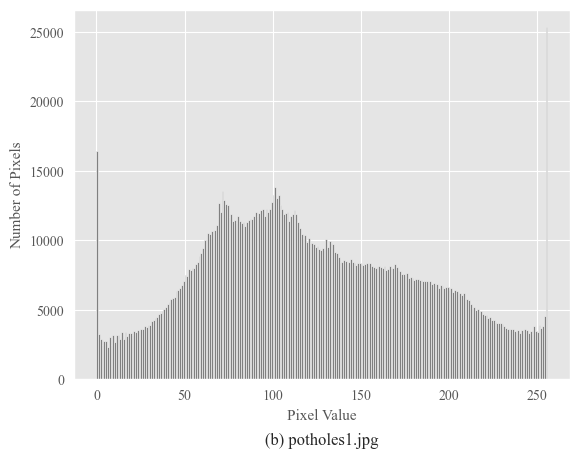

In [10]:
plt.style.use('ggplot')
plt.hist(potholesImg.ravel(),256,[0,256],color='grey')
plt.title('(b) potholes1.jpg',y=-0.2,fontsize=12)
plt.xlabel('Pixel Value',fontsize=11)
plt.ylabel('Number of Pixels',fontsize=11)
plt.savefig('Figures\\potholes1灰度直方图.pdf',bbox_inches='tight')

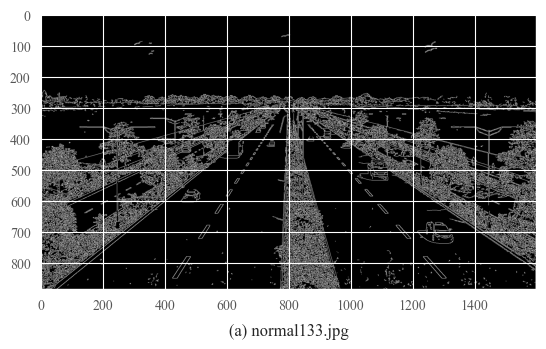

In [11]:
# 边缘检测
gray = cv2.cvtColor(normalImg, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('(a) normal133.jpg',y=-0.2,fontsize=12)
plt.savefig('Figures\\normal133边缘检测.pdf',bbox_inches='tight')

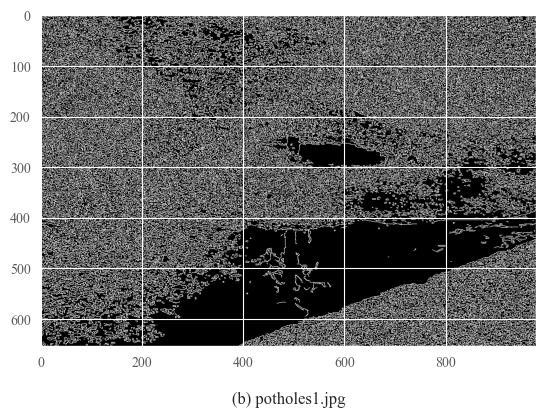

In [12]:
# 边缘检测
gray = cv2.cvtColor(potholesImg, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('(b) potholes1.jpg',y=-0.2,fontsize=12)
plt.savefig('Figures\\potholes1边缘检测.pdf',bbox_inches='tight')

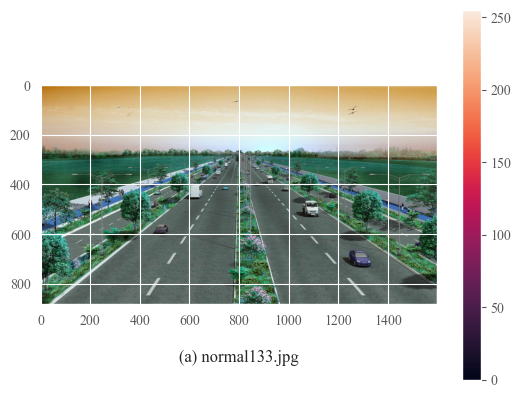

In [13]:
plt.imshow(normalImg)
plt.colorbar()
plt.title('(a) normal133.jpg',y=-0.3,fontsize=12)
plt.savefig('Figures\\normal133热力图.pdf')

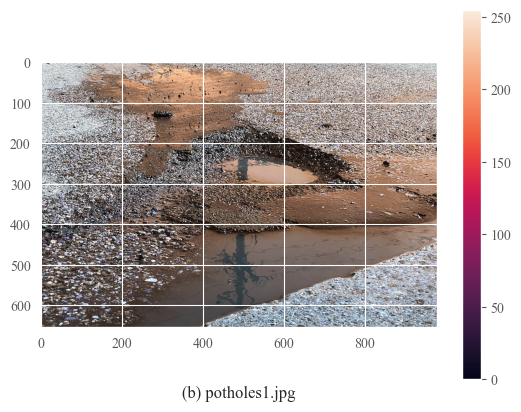

In [14]:
plt.imshow(potholesImg)
plt.colorbar()
plt.title('(b) potholes1.jpg',y=-0.3,fontsize=12)
plt.savefig('Figures\\potholes1热力图.pdf')

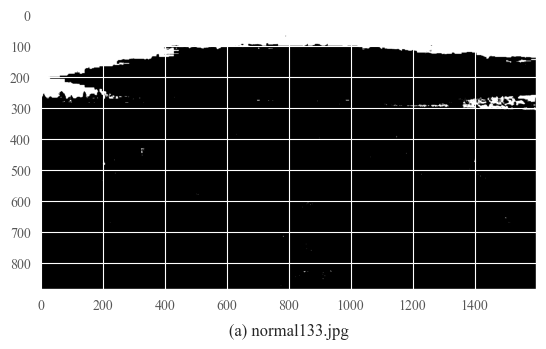

In [15]:
# 阈值分割
hsv = cv2.cvtColor(normalImg, cv2.COLOR_BGR2HSV)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')
plt.title('(a) normal133.jpg',y=-0.2,fontsize=12)
plt.savefig('Figures\\normal133阈值分割.pdf',bbox_inches='tight')

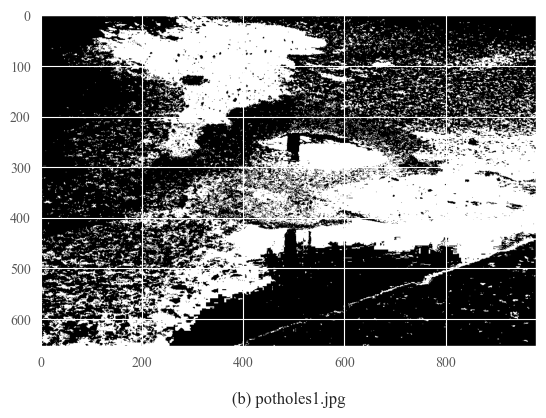

In [16]:
# 阈值分割
hsv = cv2.cvtColor(potholesImg, cv2.COLOR_BGR2HSV)
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')
plt.title('(b) potholes1.jpg',y=-0.2,fontsize=12)
plt.savefig('Figures\\potholes1阈值分割.pdf',bbox_inches='tight')

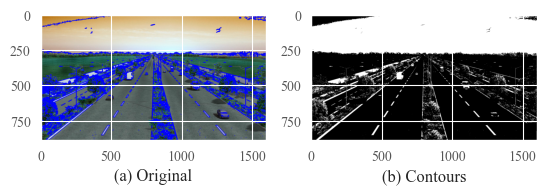

In [17]:
# 转换为灰度图像
gray = cv2.cvtColor(normalImg, cv2.COLOR_BGR2GRAY)
# 二值化
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# 轮廓检测
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
cv2.drawContours(normalImg, contours, -1, (0, 0, 255), 3)

plt.subplot(1,2,1)
plt.title('(a) Original',y=-0.4,fontsize=12)
plt.imshow(normalImg)
plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title('(b) Contours',y=-0.4,fontsize=12)
plt.savefig('Figures\\normal133轮廓检测.pdf',bbox_inches='tight')

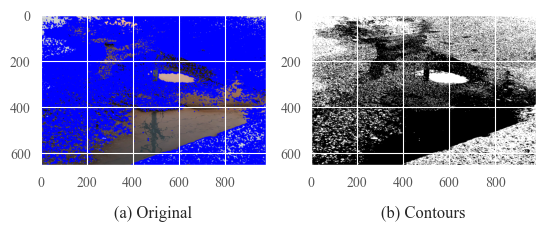

In [18]:
# 转换为灰度图像
gray = cv2.cvtColor(potholesImg, cv2.COLOR_BGR2GRAY)
# 二值化
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# 轮廓检测
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 绘制轮廓
cv2.drawContours(potholesImg, contours, -1, (0, 0, 255), 3)

plt.subplot(1,2,1)
plt.title('(a) Original',y=-0.4,fontsize=12)
plt.imshow(potholesImg)
plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title('(b) Contours',y=-0.4,fontsize=12)
plt.savefig('Figures\\potholes1轮廓检测.pdf',bbox_inches='tight')